# Case Logistic Regression

In [1]:
!pip install -q Keras

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical


Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
def plot_images(images, labels):
    fig, axes = plt.subplots(5,5)
    fig.subplots_adjust(hspace = 0.5,wspace = 0.5)
    
    for i,ax in zip(np.random.choice(range(images.shape[0]),25),axes.flat):
        ax.imshow(images[i].reshape(28,28),cmap='binary')
        ax.set_xlabel('label :{}'.format(labels[i]))
        ax.set_xticks([])
        ax.set_yticks([])

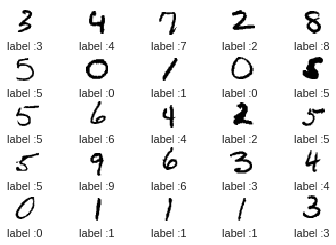

In [73]:
plot_images(X_train,y_train)

In [0]:
batch_size = 128
num_classes = 10
epochs = 30
img_rows, img_cols = 28, 28

## LR cannot take 2D input
Flatten the input image

In [79]:
X_train = X_train.reshape((-1, img_rows * img_cols))
X_test =  X_test.reshape((-1 , img_rows * img_cols))


# Scale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train images : {}'.format(X_train.shape))
print('Test images : {}'.format(X_test.shape))
print('Train labels : {}'.format(y_train.shape))
print('Test labes : {}'.format(y_test.shape))

Train images : (60000, 784)
Test images : (10000, 784)
Train labels : (60000, 10)
Test labes : (10000, 10)


# Model

In [80]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax', ))


# Compute loss and update
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.SGD(),
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs,
          verbose=1,)

Epoch 1/30
60000/60000 [==============================] - 2s 39us/step - loss: 1.2998 - acc: 0.6968
Epoch 2/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.7123 - acc: 0.8433
Epoch 3/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.5841 - acc: 0.8615
Epoch 4/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.5231 - acc: 0.8704
Epoch 5/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.4860 - acc: 0.8761
Epoch 6/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.4607 - acc: 0.8804
Epoch 7/30
14336/60000 [======>.......................] - ETA: 1s - loss: 0.4567 - acc: 0.8791

60000/60000 [==============================] - 2s 38us/step - loss: 0.4418 - acc: 0.8832
Epoch 8/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.4271 - acc: 0.8861
Epoch 9/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.4152 - acc: 0.8887
Epoch 10/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.4054 - acc: 0.8904
Epoch 11/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3970 - acc: 0.8922
Epoch 12/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3898 - acc: 0.8939
Epoch 13/30
17152/60000 [=======>......................] - ETA: 1s - loss: 0.3829 - acc: 0.8958

60000/60000 [==============================] - 2s 39us/step - loss: 0.3835 - acc: 0.8951
Epoch 14/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3779 - acc: 0.8964
Epoch 15/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3729 - acc: 0.8977
Epoch 16/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3685 - acc: 0.8987
Epoch 17/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3644 - acc: 0.8994
Epoch 18/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3607 - acc: 0.9003
Epoch 19/30
17664/60000 [=======>......................] - ETA: 1s - loss: 0.3642 - acc: 0.9000

60000/60000 [==============================] - 2s 39us/step - loss: 0.3573 - acc: 0.9013
Epoch 20/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3541 - acc: 0.9019
Epoch 21/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3512 - acc: 0.9026
Epoch 22/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3485 - acc: 0.9032
Epoch 23/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3459 - acc: 0.9037
Epoch 24/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3436 - acc: 0.9042
Epoch 25/30
16768/60000 [=======>......................] - ETA: 1s - loss: 0.3481 - acc: 0.9020

60000/60000 [==============================] - 2s 37us/step - loss: 0.3414 - acc: 0.9051
Epoch 26/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3393 - acc: 0.9053
Epoch 27/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3373 - acc: 0.9060
Epoch 28/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3355 - acc: 0.9066
Epoch 29/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3337 - acc: 0.9071
Epoch 30/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3320 - acc: 0.9078


In [82]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3168852216005325
Test accuracy: 0.9135
